# CS 4820
# Assignment 10: Comparing ANN and CNN on the CIFAR-10 DataSet

In this assignment, we are going to compare two classification models on the  [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset -- one is based on Fully-connected ANN; the other one is based on Convolutional NN.

## 1. Loading the CIFAR-10 dataset

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Shape of training data:")
X_train.shape
y_train.shape
print("Shape of test data:")
X_test.shape
y_test.shape

Shape of training data:


(50000, 32, 32, 3)

(50000, 1)

Shape of test data:


(10000, 32, 32, 3)

(10000, 1)

We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


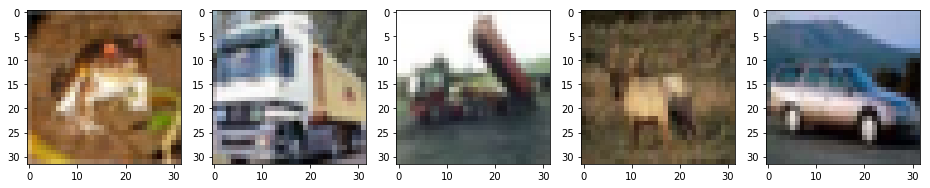

In [5]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    axarr[i].imshow(X_train[i])

## 2. Fully-connected ANN Classifier

First of all, you need to __scale__ and __reshape__ the data.

In [6]:
X_train_flat = X_train.astype('float32') / 255.0
X_test_flat = X_test.astype('float32') / 255.0

X_train_flat = X_train_flat.reshape(50000, 32*32*3)
X_test_flat = X_test_flat.reshape(10000, 32*32*3)

X_train_flat.shape
X_test_flat.shape

(50000, 3072)

(10000, 3072)

You also need to one-hot encode the targets.

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train_cat.shape
y_test_cat.shape

(50000, 10)

(10000, 10)

Then build a fully-connected ANN model. The architecure of the model is totally up to you.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, input_dim=3072, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 830,618
Trainable params: 830,618
Non-trainable params: 0
__________________________________________________

Train the model.

In [9]:
h = model.fit(X_train_flat, y_train_cat, epochs=20, verbose=2, batch_size=100, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 - 5s - loss: 1.9849 - accuracy: 0.2650 - val_loss: 1.9319 - val_accuracy: 0.3144
Epoch 2/20
45000/45000 - 5s - loss: 1.7655 - accuracy: 0.3601 - val_loss: 1.7195 - val_accuracy: 0.3830
Epoch 3/20
45000/45000 - 5s - loss: 1.6781 - accuracy: 0.3939 - val_loss: 1.6707 - val_accuracy: 0.4034
Epoch 4/20
45000/45000 - 5s - loss: 1.6204 - accuracy: 0.4173 - val_loss: 1.5955 - val_accuracy: 0.4268
Epoch 5/20
45000/45000 - 5s - loss: 1.5676 - accuracy: 0.4378 - val_loss: 1.6025 - val_accuracy: 0.4292
Epoch 6/20
45000/45000 - 5s - loss: 1.5311 - accuracy: 0.4505 - val_loss: 1.5639 - val_accuracy: 0.4444
Epoch 7/20
45000/45000 - 5s - loss: 1.4973 - accuracy: 0.4624 - val_loss: 1.5142 - val_accuracy: 0.4596
Epoch 8/20
45000/45000 - 5s - loss: 1.4703 - accuracy: 0.4725 - val_loss: 1.5023 - val_accuracy: 0.4658
Epoch 9/20
45000/45000 - 5s - loss: 1.4460 - accuracy: 0.4808 - val_loss: 1.4935 - val_accuracy: 0.4684
Epoch 10/20
450

Plot the training history (like what was done in Tutorial 10).

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

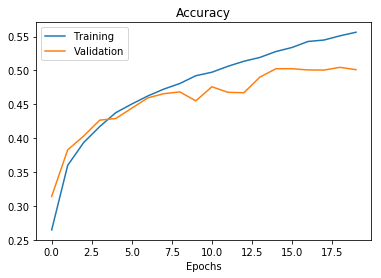

In [11]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Check the performance on the training and testing datasets respectively (like what was done in Tutorial 10).

In [12]:
train_acc = model.evaluate(X_train_flat, y_train_cat,
                           verbose=0)[1]
test_acc = model.evaluate(X_test_flat, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc))
print("Test accuracy: {:0.4f}".format(test_acc))

Train accuracy: 0.5523
Test accuracy: 0.4941


For your reference, below was how the accurary results of my model looked like during training:

![ann_training_history](./assets/ann_training_history.png)


Below was the performace of my model on the training and testing datasets respectively:

- Train accuracy: 0.4599
- Test accuracy: 0.4344

## 3. CNN Classifier


Ensure that the dataset is ready for the convolution.

In [13]:
X_train_t = X_train.astype('float32') / 255.0
X_test_t = X_test.astype('float32') / 255.0

X_train_t.shape
X_test_t.shape

(50000, 32, 32, 3)

(10000, 32, 32, 3)

Then build a CNN-based model. The architecure of the model is totally up to you.

In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation

model_2 = Sequential()
model_2.add(Conv2D(16, (5, 5), input_shape=(32,32,3), kernel_initializer='normal'))
model_2.add(MaxPooling2D(pool_size=(3,3)))
model_2.add(Activation('relu'))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
activation (Activation)      (None, 9, 9, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1296)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               332032    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

Train the model.

In [15]:
h = model_2.fit(X_train_t, y_train_cat, batch_size=100,
              epochs=25, verbose=1, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 24s 541us/sample - loss: 1.9328 - accuracy: 0.2866 - val_loss: 1.7261 - val_accuracy: 0.3944
Epoch 2/25
45000/45000 [==============================] - 24s 531us/sample - loss: 1.5166 - accuracy: 0.4554 - val_loss: 1.4333 - val_accuracy: 0.5012
Epoch 3/25
45000/45000 [==============================] - 24s 527us/sample - loss: 1.3312 - accuracy: 0.5277 - val_loss: 1.2127 - val_accuracy: 0.5724
Epoch 4/25
45000/45000 [==============================] - 24s 524us/sample - loss: 1.2040 - accuracy: 0.5722 - val_loss: 1.2349 - val_accuracy: 0.5668
Epoch 5/25
45000/45000 [==============================] - 24s 534us/sample - loss: 1.0936 - accuracy: 0.6119 - val_loss: 1.1076 - val_accuracy: 0.6132
Epoch 6/25
45000/45000 [==============================] - 24s 531us/sample - loss: 0.9928 - accuracy: 0.6506 - val_loss: 1.0774 - val_accuracy: 0.6290
Epoch 7/25
45000/45000 [=====================

Plot the training history (like what was done in Tutorial 10).

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

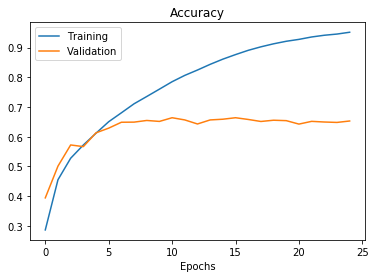

In [16]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Check the performance on the training and testing datasets respectively (like what was done in Tutorial 10).

In [17]:
train_acc = model_2.evaluate(X_train_t, y_train_cat,
                           verbose=0)[1]
test_acc = model_2.evaluate(X_test_t, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc))
print("Test accuracy: {:0.4f}".format(test_acc))

Train accuracy: 0.9380
Test accuracy: 0.6334


For your reference, below was how the accurary results of my model looked like during training:

![cnn_training_history](./assets/cnn_training_history.png)


Below was the performace of my model on the training and testing datasets respectively:

- Train accuracy: 0.9258
- Test accuracy: 0.6789

As you could see, the CNN-based classifier achieved a much better performance than the ANN-based model. Apparently, overfitting still occured. To avoid this, additional regularization techniques such as dropping, batch normalization, data Augmentation, etc. could be applied. However, we are running out of time as this semester is getting to its end. I will leave these techniques to you as after-class research.